In [12]:
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, plot_roc_curve, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, make_scorer

import joblib
from scipy.stats import ttest_ind

In [13]:
# Load data
df = pd.read_csv('data/Salaries.csv')

In [14]:
# Print first 5 rows
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [15]:
# Rename columns
df.rename(columns={'yrs.since.phd': 'yrs_since_phd', 'yrs.service': 'yrs_service'}, inplace=True)

In [16]:
# Check NAs and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs_since_phd  397 non-null    int64 
 3   yrs_service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [17]:
# Create numerical and categorical variable lists
num_vars = ['yrs_since_phd', 'yrs_service', 'salary']
cat_vars = ['rank', 'discipline', 'sex']

In [18]:
# Look at numerical value stats
df.describe()

,yrs_since_phd,yrs_service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


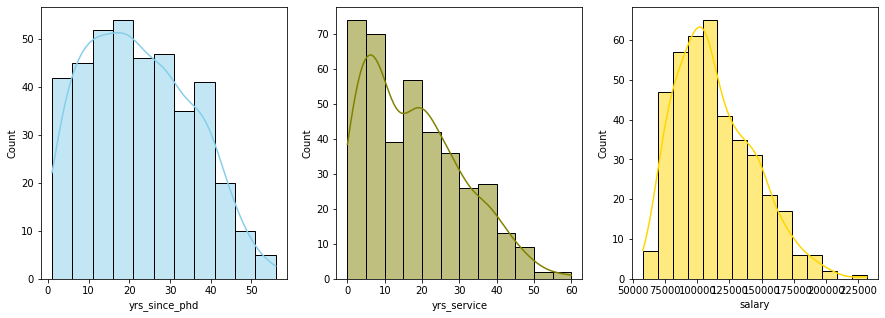

In [19]:
# Plot numerical variables
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)
val_clrs = ['skyblue', 'olive', 'gold']

for i in range(3):    
    sns.histplot(data=df, x = num_vars[i], kde=True, color = val_clrs[i], ax=ax[i])

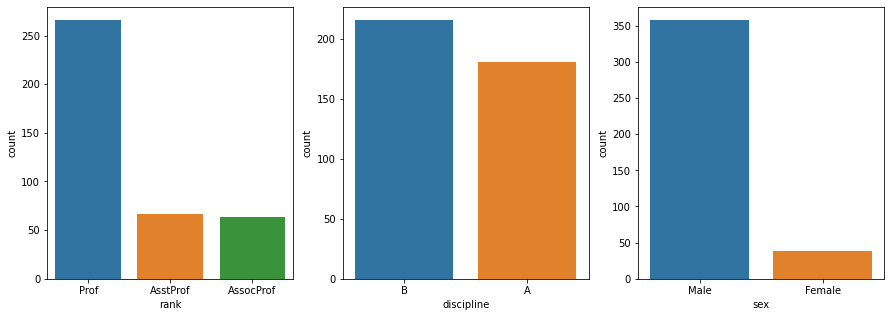

In [20]:
# Plot categorical variables
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)
val_clrs = ['skyblue', 'olive', 'gold']

for i in range(3):    
    sns.countplot(data=df, x = cat_vars[i], ax=ax[i])

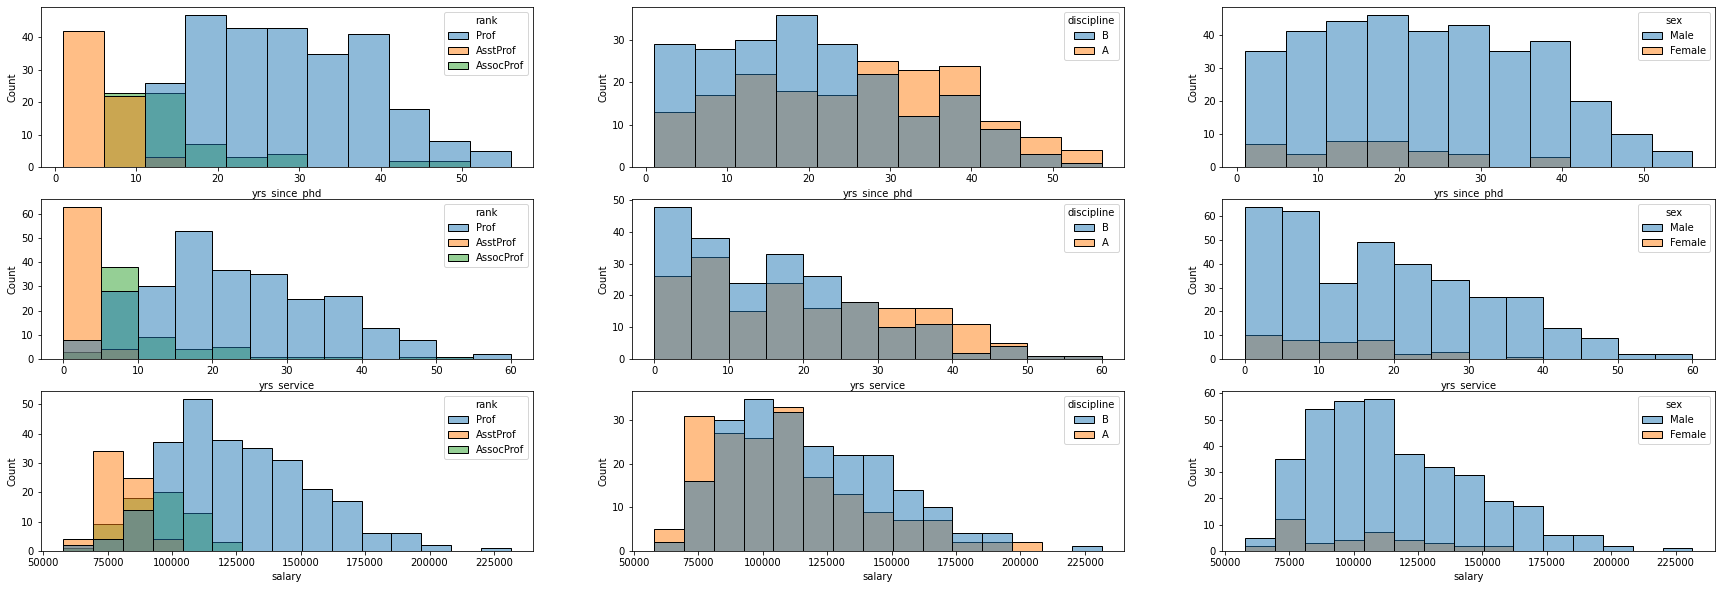

In [21]:
# Plot numerical variables
fig, ax = plt.subplots(3, 3)
fig.set_size_inches(30, 10)
val_clrs = ['skyblue', 'olive', 'gold']

for i in range(3):
    for j in range(3):
        sns.histplot(data=df, x = num_vars[i], hue = cat_vars[j], ax=ax[i, j])

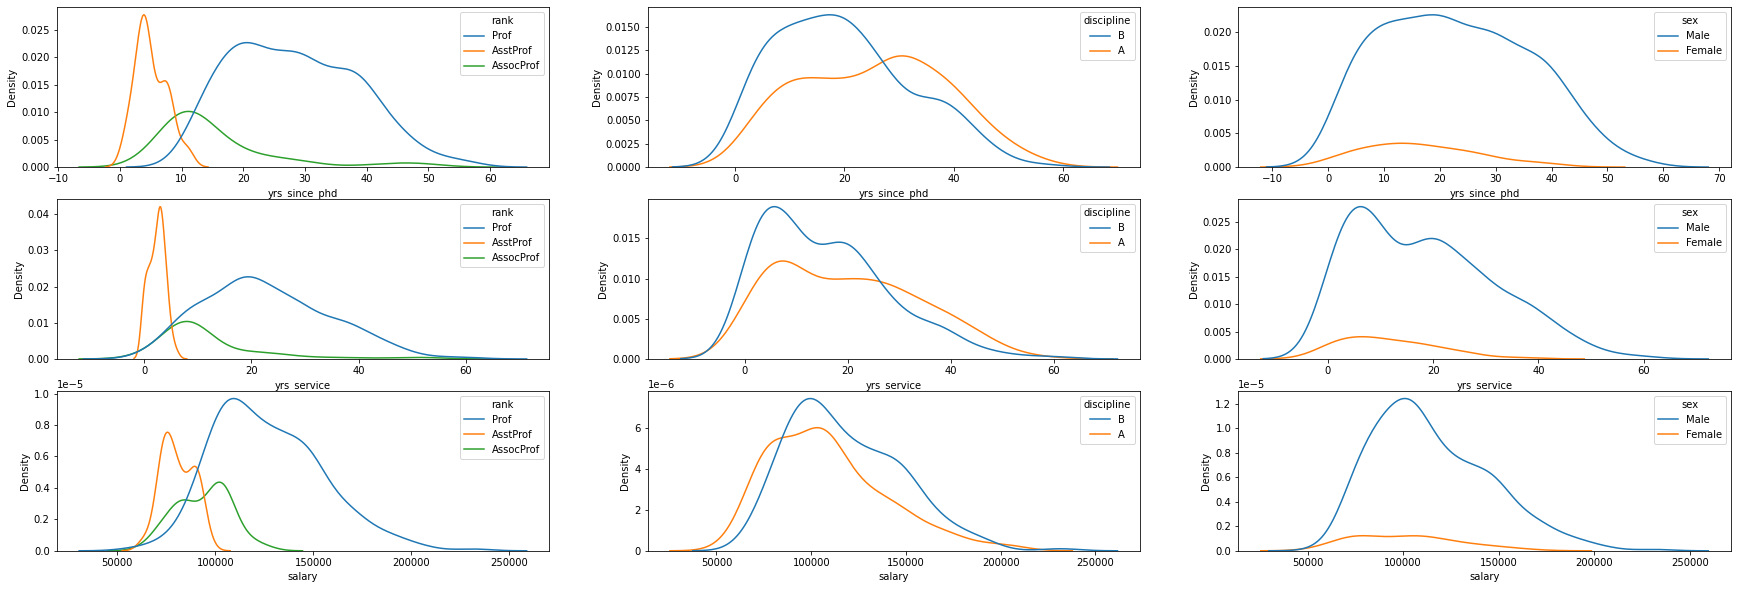

In [22]:
# Plot numerical variables
fig, ax = plt.subplots(3, 3)
fig.set_size_inches(30, 10)
val_clrs = ['skyblue', 'olive', 'gold']

for i in range(3):
    for j in range(3):
        sns.kdeplot(data=df, x = num_vars[i], hue = cat_vars[j], ax=ax[i, j])

In [23]:
df.groupby('discipline')['salary'].mean()

discipline
A    108548.430939
B    118028.694444
Name: salary, dtype: float64

<AxesSubplot:xlabel='discipline', ylabel='count'>

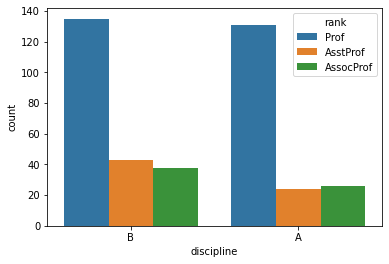

In [24]:
sns.countplot(data=df, x = 'discipline', hue='rank')

<AxesSubplot:xlabel='discipline', ylabel='count'>

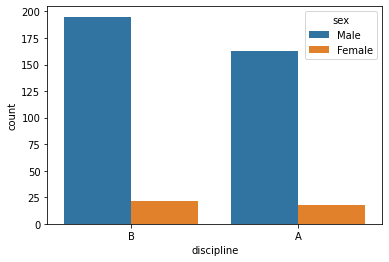

In [25]:
sns.countplot(data=df, x = 'discipline', hue='sex')

<AxesSubplot:xlabel='rank', ylabel='count'>

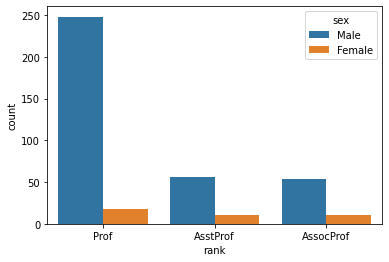

In [26]:
sns.countplot(data=df, x = 'rank', hue='sex')

In [27]:
df

,rank,discipline,yrs_since_phd,yrs_service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [28]:
# Average salary by sex
df.groupby(['rank', 'sex'])['salary'].mean()

rank       sex   
AssocProf  Female     88512.800000
           Male       94869.703704
AsstProf   Female     78049.909091
           Male       81311.464286
Prof       Female    121967.611111
           Male      127120.822581
Name: salary, dtype: float64

In [29]:
# Average salary by sex
df.groupby(['discipline', 'sex'])['salary'].mean()

discipline  sex   
A           Female     89064.944444
            Male      110699.981595
B           Female    111234.523810
            Male      118760.374359
Name: salary, dtype: float64

In [30]:
df.groupby(['discipline', 'rank', 'sex'])['salary'].mean()

discipline  rank       sex   
A           AssocProf  Female     72128.500000
                       Male       85048.863636
            AsstProf   Female     72933.333333
                       Male       74269.611111
            Prof       Female    109631.875000
                       Male      120619.260163
B           AssocProf  Female     99435.666667
                       Male      101621.531250
            AsstProf   Female     84189.800000
                       Male       84647.078947
            Prof       Female    131836.200000
                       Male      133518.360000
Name: salary, dtype: float64

<AxesSubplot:xlabel='rank', ylabel='count'>

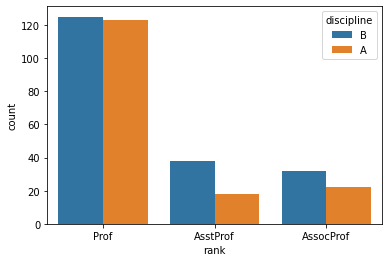

In [35]:
sns.countplot(data=df[df['sex'] == 'Male'], x = 'rank', hue='discipline')

<AxesSubplot:xlabel='rank', ylabel='count'>

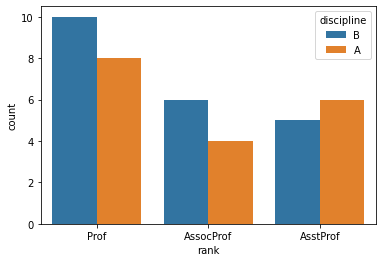

In [36]:
sns.countplot(data=df[df['sex'] == 'Female'], x = 'rank', hue='discipline')

<AxesSubplot:xlabel='yrs_since_phd', ylabel='salary'>

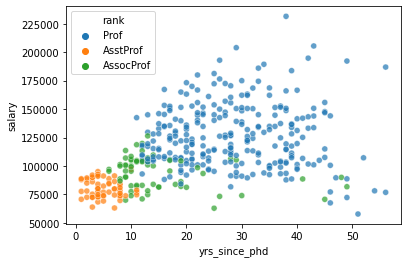

In [37]:
sns.scatterplot(data=df, x = 'yrs_since_phd', y = 'salary', hue = 'rank', alpha=0.7)

<AxesSubplot:xlabel='yrs_since_phd', ylabel='salary'>

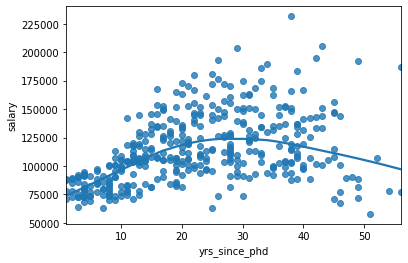

In [41]:
sns.regplot(data=df, x = 'yrs_since_phd', y = 'salary', lowess = True)

<AxesSubplot:xlabel='yrs_service', ylabel='salary'>

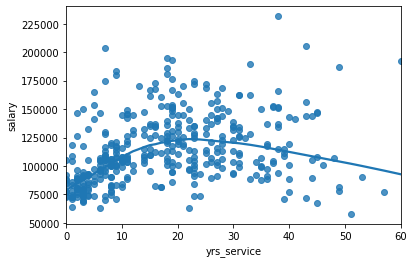

In [42]:
sns.regplot(data=df, x = 'yrs_service', y = 'salary', lowess = True)

<AxesSubplot:xlabel='yrs_since_phd', ylabel='salary'>

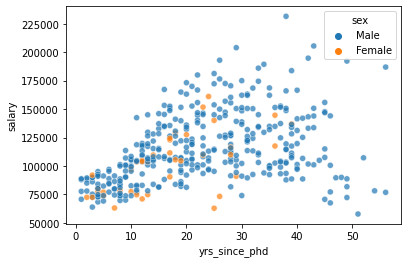

In [617]:
sns.scatterplot(data=df, x = 'yrs_since_phd', y = 'salary', hue = 'sex', alpha=0.7)

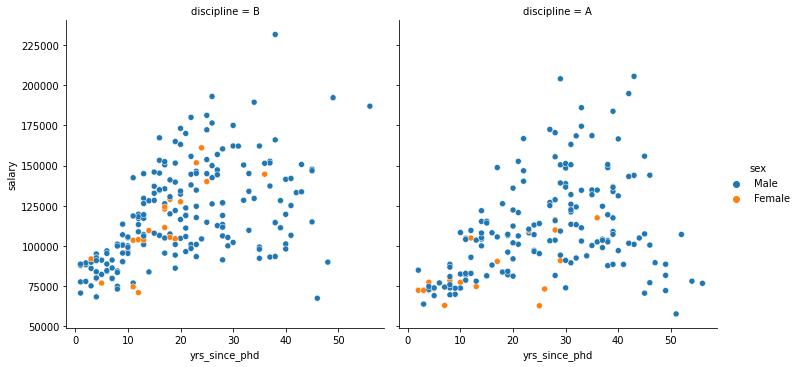

In [641]:
sns.relplot(data=df, x = 'yrs_since_phd', y = 'salary', hue = 'sex', col = 'discipline')

In [635]:
df.groupby(['discipline', 'rank', 'sex'])['salary'].mean()

discipline  rank       sex   
A           AssocProf  Female     72128.500000
                       Male       85048.863636
            AsstProf   Female     72933.333333
                       Male       74269.611111
            Prof       Female    109631.875000
                       Male      120619.260163
B           AssocProf  Female     99435.666667
                       Male      101621.531250
            AsstProf   Female     84189.800000
                       Male       84647.078947
            Prof       Female    131836.200000
                       Male      133518.360000
Name: salary, dtype: float64

In [637]:
df.groupby(['discipline', 'rank', 'sex'])['sex'].count()

discipline  rank       sex   
A           AssocProf  Female      4
                       Male       22
            AsstProf   Female      6
                       Male       18
            Prof       Female      8
                       Male      123
B           AssocProf  Female      6
                       Male       32
            AsstProf   Female      5
                       Male       38
            Prof       Female     10
                       Male      125
Name: sex, dtype: int64

<AxesSubplot:xlabel='yrs_service', ylabel='salary'>

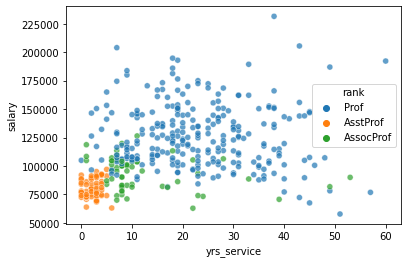

In [279]:
sns.scatterplot(data=df, x = 'yrs_service', y = 'salary', hue = 'rank', alpha=0.7)

Comparing both the plots, yrs_since_phd is a stronger predictor for higher salary than yrs_service

<AxesSubplot:xlabel='yrs_service', ylabel='salary'>

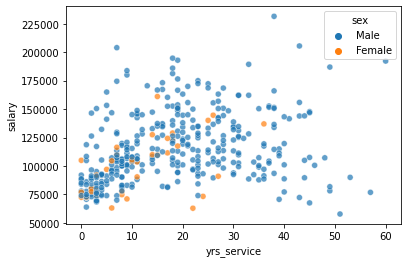

In [619]:
sns.scatterplot(data=df, x = 'yrs_service', y = 'salary', hue = 'sex', alpha=0.7)

<AxesSubplot:xlabel='yrs_service', ylabel='yrs_since_phd'>

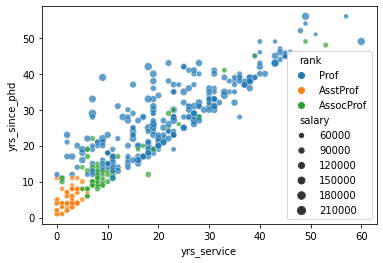

In [280]:
sns.scatterplot(data=df, x = 'yrs_service', y = 'yrs_since_phd', hue = 'rank', size = 'salary', alpha=0.7)

<AxesSubplot:xlabel='rank', ylabel='salary'>

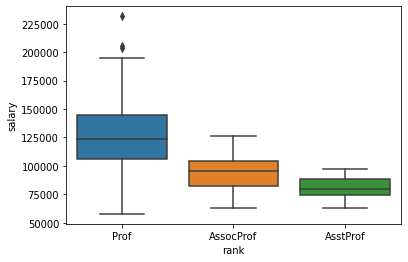

In [615]:
sns.boxplot(data=df, x = 'rank', y = 'salary', order=['Prof', 'AssocProf', 'AsstProf'])

<AxesSubplot:xlabel='rank', ylabel='salary'>

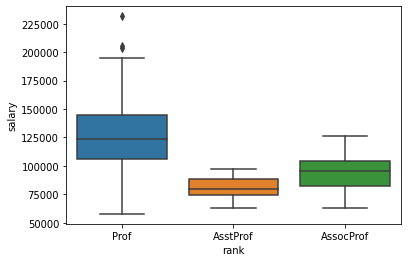

In [282]:
sns.boxplot(data=df, x = 'rank', y = 'salary')

<AxesSubplot:xlabel='sex', ylabel='salary'>

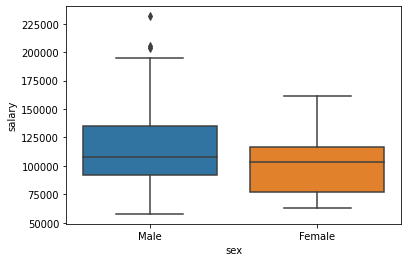

In [627]:
sns.boxplot(data=df, x = 'sex', y = 'salary')

<AxesSubplot:xlabel='discipline', ylabel='salary'>

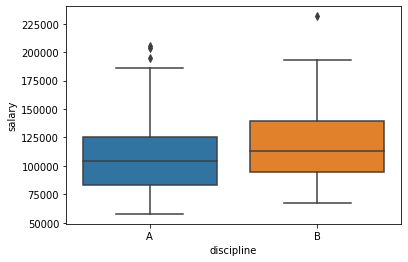

In [640]:
sns.boxplot(data=df, x = 'discipline', y = 'salary', order=['A', 'B'])

<AxesSubplot:xlabel='yrs_since_phd', ylabel='salary'>

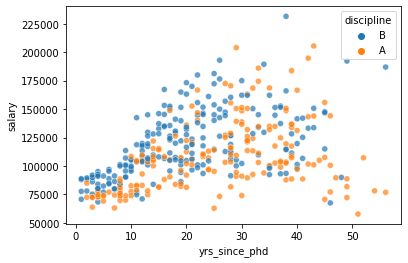

In [283]:
# no difference, but seems discipline B has higher salaries, maybe because of demand
sns.scatterplot(data=df, x = 'yrs_since_phd', y = 'salary', hue = 'discipline', alpha=0.7)

In [624]:
# Percentage of teachers by discipline
df.groupby('discipline')['sex'].value_counts()

discipline  sex   
A           Male      163
            Female     18
B           Male      195
            Female     21
Name: sex, dtype: int64

In [625]:
print(163/(163+18))
print(195/(195+21))

0.9005524861878453
0.9027777777777778


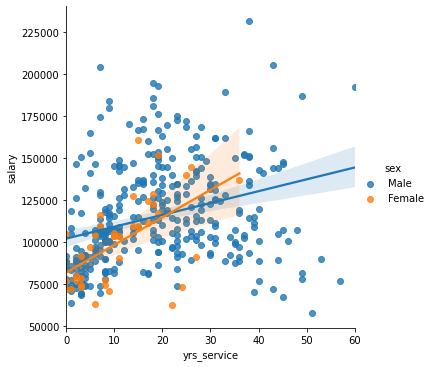

In [284]:
sns.lmplot(data=df, x = 'yrs_service', y = 'salary', hue = 'sex')

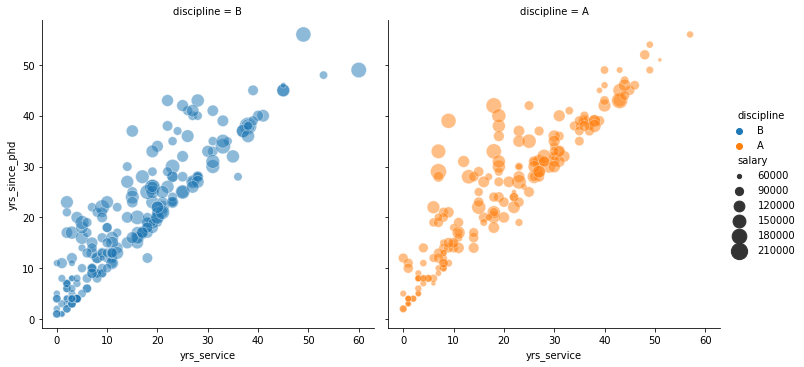

In [285]:
# Very few people who are professors before a phd. Interesting. Who are these people?
# Also if you have more years of phd than service, doesn't really impact your salary.
sns.relplot(data=df, x = 'yrs_service', y = 'yrs_since_phd', size='salary', hue = 'discipline', sizes= (15, 300), alpha = 0.5, col = 'discipline')

In [286]:
# Maybe these were considered for demand in the field. We can see most of them are discipline B
df[df['yrs_service'] - df['yrs_since_phd'] > 2].sort_values(['yrs_service', 'yrs_since_phd'])

,rank,discipline,yrs_since_phd,yrs_service,sex,salary
156,AssocProf,B,12,18,Male,113341
244,Prof,A,19,23,Male,84273
344,Prof,B,32,35,Male,150376
69,Prof,B,28,36,Male,91412
194,AssocProf,B,48,53,Male,90000
330,Prof,B,49,60,Male,192253


# Analysis

In [287]:
# What percentage of records are Assistant Professors with less than 5 years of experience?
print(round(df[(df['rank'] == 'AsstProf') & (df['yrs_service'] < 5)].shape[0]/df.shape[0] * 100, 2))

15.87


In [597]:
# Is there a statistically significant difference between female and male salaries?
salaries_male = df.loc[df['sex'] == 'Male', 'salary']
salaries_female = df.loc[df['sex'] == 'Female', 'salary']

stat, p = ttest_ind(salaries_male, salaries_female)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('NOT statistically significant.')
else:
    print('Statistically significant.')

stat=2.782, p=0.006
Statistically significant.


In [600]:
salaries_male.mean()

115090.41899441341

In [601]:
salaries_female.mean()

101002.41025641025

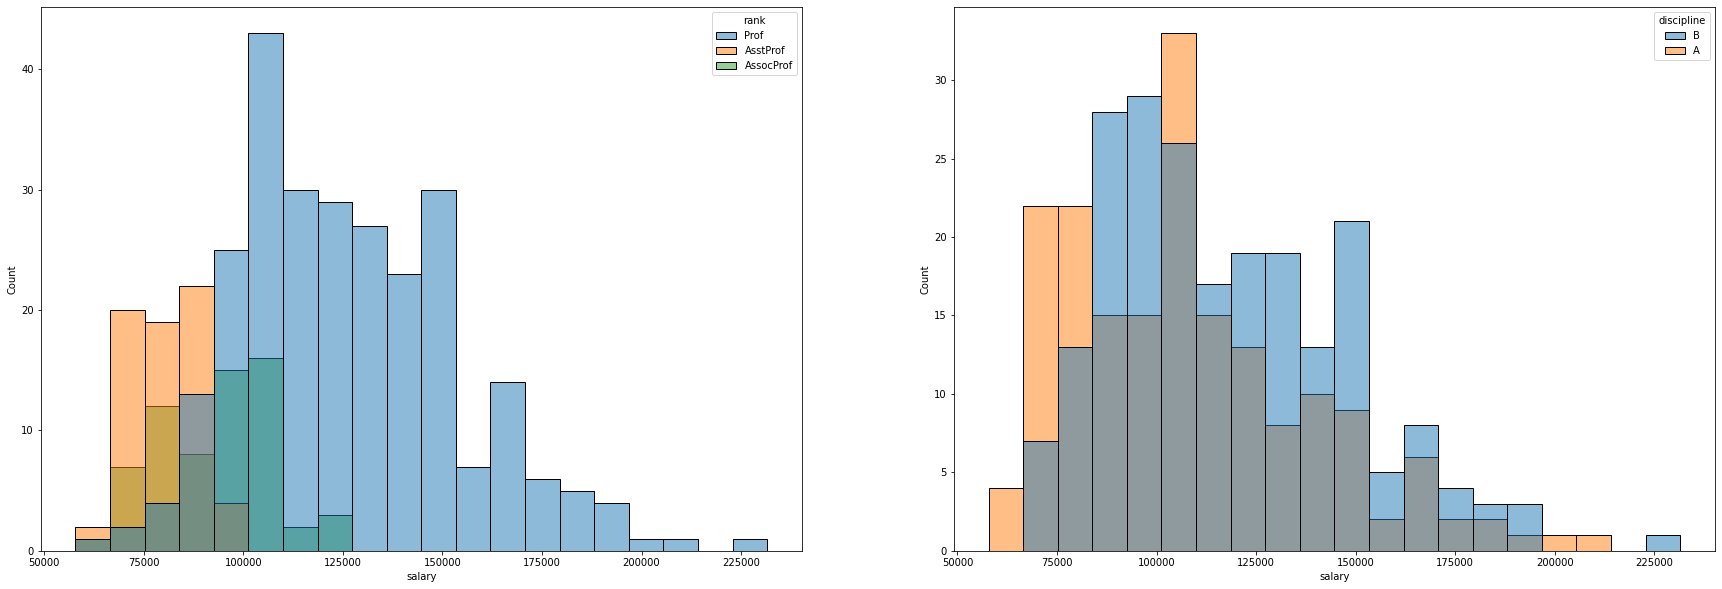

In [289]:
# What is the distribution of salary by rank and discipline?
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(30, 10)
val_clrs = ['skyblue', 'olive', 'gold']

for i in range(2):
    sns.histplot(data=df, x = num_vars[2], hue = cat_vars[i], ax=ax[i], bins=20)

In [290]:
# How would you recode discipline as a 0/1 binary indicator?
df['discipline']

0      B
1      B
2      B
3      B
4      B
      ..
392    A
393    A
394    A
395    A
396    A
Name: discipline, Length: 397, dtype: object

In [603]:
df['discipline'].apply(lambda x: 1 if x == 'A' else 0)

0      0
1      0
2      0
3      0
4      0
      ..
392    1
393    1
394    1
395    1
396    1
Name: discipline, Length: 397, dtype: int64

In [291]:
enc = OneHotEncoder()
enc.fit(df[['discipline']])
pd.DataFrame(data=enc.transform(df[['discipline']]).toarray(), columns=enc.categories_)

,A,B
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
392,1.0,0.0
393,1.0,0.0
394,1.0,0.0
395,1.0,0.0


# Model Building

In [292]:
# Define features and target variable
features = num_vars + cat_vars
target = 'salary'
features.remove(target)

print('Features: {}'.format(features))
print('Target: {}'.format(target))

Features: ['yrs_since_phd', 'yrs_service', 'rank', 'discipline', 'sex']
Target: salary


In [293]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], random_state=42)

print('X_train: {}'.format(X_train.shape))
print('y_train: {}'.format(X_test.shape))
print('X_test: {}'.format(y_train.shape))
print('y_test: {}'.format(y_test.shape))

X_train: (297, 5)
y_train: (100, 5)
X_test: (297,)
y_test: (100,)


In [294]:
# OneHotEncoder for categorical variables
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), cat_vars)
],
remainder='passthrough')

In [295]:
# Show training dataset
X_train.head()

,yrs_since_phd,yrs_service,rank,discipline,sex
16,19,20,Prof,B,Male
66,22,12,Prof,B,Male
379,11,8,AssocProf,A,Male
7,45,45,Prof,B,Male
19,39,36,Prof,A,Female


In [296]:
# Show transformed training dataset
pd.DataFrame(data=preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names()).head()

,ohe__x0_AssocProf,ohe__x0_AsstProf,ohe__x0_Prof,ohe__x1_A,ohe__x1_B,ohe__x2_Female,ohe__x2_Male,yrs_since_phd,yrs_service
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,19.0,20.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,22.0,12.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,11.0,8.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,45.0,45.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,39.0,36.0


In [300]:
# Create ML pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

In [304]:
# Define hyperparameters for grid search
parameters = {
    'model__max_depth': [2, 4, 6, 8],
    'model__min_samples_split': [10, 20, 30],
    'model__random_state': [42]
}

In [305]:
# Run grid search on ML pipeline
cv = GridSearchCV(pipeline, param_grid=parameters, cv=3)
cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(),
                                                                         ['rank',
                                                                          'discipline',
                                                                          'sex'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [2, 4, 6, 8],
                         'model__min_samples_split': [10, 20, 30],
                         'model__random_state': [42]})

In [306]:
# Show best hyperparameters
cv.best_params_

{'model__max_depth': 4,
 'model__min_samples_split': 10,
 'model__random_state': 42}

<AxesSubplot:>

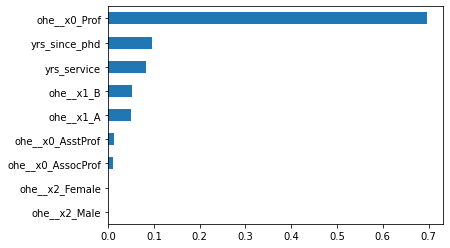

In [308]:
# Show feature importances
feature_importance = pd.Series(data = cv.best_estimator_['model'].feature_importances_, index=preprocessor.get_feature_names()).sort_values()
feature_importance.plot(kind='barh')

In [309]:
# Predict on test data
preds = cv.predict(X_test)

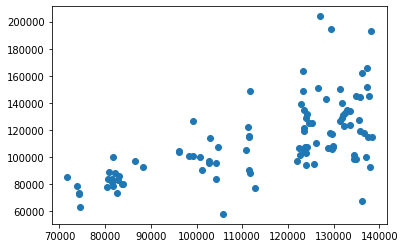

In [310]:
# Model Performance
plt.scatter(preds, y_test)

In [311]:
# Model Performance
round(np.corrcoef(preds, y_test)[0][1], 2)

0.63

In [604]:
class ModelContainer:
    def __init__(self, df, model_type='regression'):
        # Define variables
        self.df = df.copy()
        self.model_type = model_type
        self.num_vars = ['yrs_since_phd', 'yrs_service', 'salary']
        self.cat_vars = ['rank', 'discipline', 'sex']
        self.target = 'salary'
        self.features = []
        self.parameters = {'model__max_depth': [2, 4, 6, 8],
                           'model__min_samples_split': [5, 10, 15, 20, 30],
                           'model__random_state': [42]
                           }
    
        # Create features list
        self.features = self.num_vars + self.cat_vars
        self.features.remove(self.target)
        
        # Create target variable
        if self.model_type == 'classification':
            self.df[self.target] = self.df[self.target].apply(lambda x: 1 if x >= np.median(self.df[self.target]) else 0)
        
        # Print features and target list
        print('Features: {}'.format(self.features))
        print('Target: {}'.format(self.target))
    
    def split_data(self):
        # Split data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.df[self.features], self.df[self.target], test_size = 0.2, random_state=42)

        print('X_train: {}'.format(self.X_train.shape))
        print('y_train: {}'.format(self.X_test.shape))
        print('X_test: {}'.format(self.y_train.shape))
        print('y_test: {}'.format(self.y_test.shape))
    
    def create_ohe(self):
        # OneHotEncoder for categorical variables
        self.preprocessor = ColumnTransformer([
            ('ohe', OneHotEncoder(), self.cat_vars)
        ],
        remainder='passthrough')
        
        # Print original data
        print('Training Dataset - Unprocessed')
        print(tabulate(X_train.head(), headers='keys', tablefmt='psql'))
        
        # Print transformed data
        preprocessed_data = pd.DataFrame(data=preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names())
        print('Training Dataset - Processed')
        print(tabulate(preprocessed_data.head(), headers='keys', tablefmt='psql'))

    def create_ml_pipeline(self):
         # Create ML pipeline
        if self.model_type == 'regression':
            model = RandomForestRegressor()
        else:
            model = RandomForestClassifier()
        # Create ML pipeline
        self.pipeline = Pipeline([
            ('preprocessor', self.preprocessor),
            ('model', model)
        ])
    
    def train_model(self):
        # Run grid search on ML pipeline
        if self.model_type == 'regression':
            self.model = GridSearchCV(self.pipeline, param_grid=self.parameters, cv=3)
            self.model.fit(self.X_train, self.y_train)
        else:
            scorer = make_scorer(f1_score)
            self.model = GridSearchCV(self.pipeline, param_grid=self.parameters, scoring=scorer, cv=3)
            self.model.fit(self.X_train, self.y_train)
            
        
    def plot_feature_importance(self):
        # Show feature importances
        feature_importance = pd.Series(data = self.model.best_estimator_['model'].feature_importances_, index=preprocessor.get_feature_names()).sort_values()
        feature_importance.plot(kind='barh')
        plt.title('Feature Importance')
    
    def plot_model_performance(self):
        
        if self.model_type == 'regression':
            preds = self.model.predict(self.X_test)
            plt.scatter(preds, self.y_test)
            plt.xlabel('Predicted Salary')
            plt.ylabel('Actual Salary')
            
            model_corr = round(np.corrcoef(preds, self.y_test)[0][1], 2)
            model_rmse = round(np.sqrt(mean_squared_error(self.y_test, preds)),2)
            plt.title('Correlation: {}\nRoot Mean Squared Error: {}'.format(model_corr, model_rmse))
            
        else:
            preds = self.model.predict(self.X_test)
            print(preds)
            print(confusion_matrix(self.y_test, preds))
            tn, fp, fn, tp = confusion_matrix(self.y_test, preds).ravel()
            print(tp, tn, fp, fn)
            print('Accuracy: {}\nPrecision: {}\nRecall: {}\nAUC Score: {}'.format(accuracy_score(self.y_test, preds), precision_score(self.y_test, preds), recall_score(self.y_test, preds), roc_auc_score(self.y_test, preds)))
            plot_roc_curve(self.model, self.X_test, self.y_test)  
            plt.show() 
    
    def save_model(self):
        if self.model_type == 'regression':
            model_path = 'model/rgr.pkl'
        else:
            model_path = 'model/clf.pkl'
        
        joblib.dump(self.model, model_path)
        print('Model saved!')


## Regression Model

In [605]:
rgr = ModelContainer(df, model_type = 'regression')

Features: ['yrs_since_phd', 'yrs_service', 'rank', 'discipline', 'sex']
Target: salary


In [606]:
rgr.split_data()

X_train: (317, 5)
y_train: (80, 5)
X_test: (317,)
y_test: (80,)


In [607]:
rgr.create_ohe()

Training Dataset - Unprocessed
+-----+-----------------+---------------+-----------+--------------+--------+
|     |   yrs_since_phd |   yrs_service | rank      | discipline   | sex    |
|-----+-----------------+---------------+-----------+--------------+--------|
|  16 |              19 |            20 | Prof      | B            | Male   |
|  66 |              22 |            12 | Prof      | B            | Male   |
| 379 |              11 |             8 | AssocProf | A            | Male   |
|   7 |              45 |            45 | Prof      | B            | Male   |
|  19 |              39 |            36 | Prof      | A            | Female |
+-----+-----------------+---------------+-----------+--------------+--------+
Training Dataset - Processed
+----+---------------------+--------------------+----------------+-------------+-------------+------------------+----------------+-----------------+---------------+
|    |   ohe__x0_AssocProf |   ohe__x0_AsstProf |   ohe__x0_Prof |   ohe_

In [608]:
rgr.create_ml_pipeline()

In [609]:
rgr.pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe', OneHotEncoder(),
                                                  ['rank', 'discipline',
                                                   'sex'])])),
                ('model', RandomForestRegressor())])

In [610]:
rgr.train_model()

In [611]:
rgr.model.best_params_

{'model__max_depth': 4,
 'model__min_samples_split': 15,
 'model__random_state': 42}

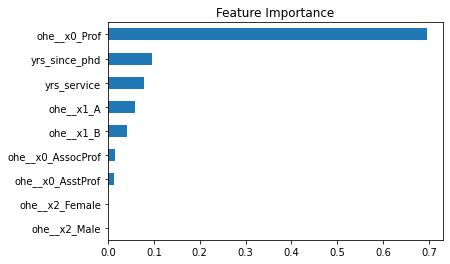

In [612]:
rgr.plot_feature_importance()

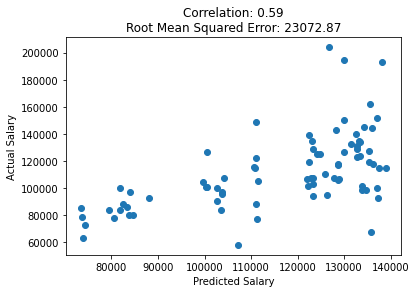

In [613]:
rgr.plot_model_performance()

In [614]:
rgr.save_model()

Model saved!


# Classification Model

In [561]:
clf = ModelContainer(df, model_type = 'classification')

Features: ['yrs_since_phd', 'yrs_service', 'rank', 'discipline', 'sex']
Target: salary


<AxesSubplot:>

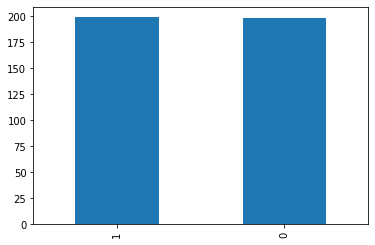

In [562]:
# No class imbalance
clf.df['salary'].value_counts().plot(kind='bar')

In [563]:
clf.split_data()

X_train: (317, 5)
y_train: (80, 5)
X_test: (317,)
y_test: (80,)


In [564]:
clf.create_ohe()

Training Dataset - Unprocessed
+-----+-----------------+---------------+-----------+--------------+--------+
|     |   yrs_since_phd |   yrs_service | rank      | discipline   | sex    |
|-----+-----------------+---------------+-----------+--------------+--------|
|  16 |              19 |            20 | Prof      | B            | Male   |
|  66 |              22 |            12 | Prof      | B            | Male   |
| 379 |              11 |             8 | AssocProf | A            | Male   |
|   7 |              45 |            45 | Prof      | B            | Male   |
|  19 |              39 |            36 | Prof      | A            | Female |
+-----+-----------------+---------------+-----------+--------------+--------+
Training Dataset - Processed
+----+---------------------+--------------------+----------------+-------------+-------------+------------------+----------------+-----------------+---------------+
|    |   ohe__x0_AssocProf |   ohe__x0_AsstProf |   ohe__x0_Prof |   ohe_

In [565]:
clf.create_ml_pipeline()
clf.pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe', OneHotEncoder(),
                                                  ['rank', 'discipline',
                                                   'sex'])])),
                ('model', RandomForestClassifier())])

In [566]:
clf.train_model()
clf.model.best_params_

{'model__max_depth': 4,
 'model__min_samples_split': 10,
 'model__random_state': 42}

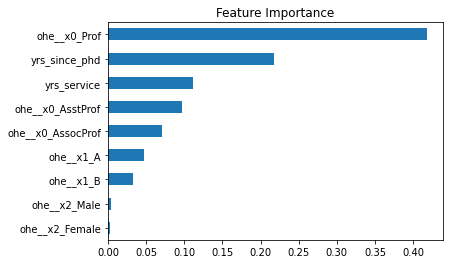

In [567]:
clf.plot_feature_importance()

[1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1
 0 1 1 0 1 1]
[[25 16]
 [ 1 38]]
38 25 16 1
Accuracy: 0.7875
Precision: 0.7037037037037037
Recall: 0.9743589743589743
AUC Score: 0.7920575359599751


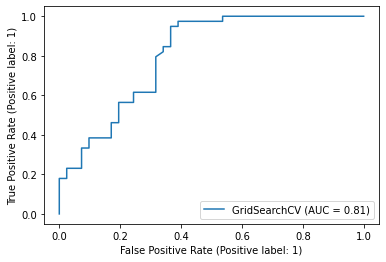

In [642]:
clf.plot_model_performance()

In [569]:
clf.y_test.value_counts()

0    41
1    39
Name: salary, dtype: int64

In [570]:
clf.save_model()

Model saved!


In [585]:
mydata = [[19], [20], ['Prof'], ['B'], ['Male']]
col_names = ['yrs_since_phd', 'yrs_service', 'rank', 'discipline', 'sex']

data_dict = dict(zip(col_names, mydata))
# pd.DataFrame(data=[19, 20, 'Prof', 'B', 'Male'], columns=['yrs_since_phd', 'yrs_service', 'rank', 'discipline', 'sex'])

# rgr.model.predict([19, 20, 'Prof', 'B', 'Male'])

In [588]:
predict_data = pd.DataFrame.from_dict(data_dict)

In [592]:
rgr.model.predict(predict_data)[0]

132143.2061259884

In [591]:
clf.model.predict(predict_data)[0]

1

In [ ]:
Things for additional analysis
Publications
Awards
No. of courses/programs taught
Distance Travelled (Travel compensation)
Breakdown of salary